In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from sklearn.decomposition import PCA
import scipy.io as sio
np.random.seed(7)

In [3]:
Data=sio.loadmat('/content/drive/MyDrive/datasets/KSC.mat')['KSC']
Label=sio.loadmat('/content/drive/MyDrive/datasets/KSC_gt.mat')['KSC_gt']

Data=np.reshape(Data,(Data.shape[0]*Data.shape[1],Data.shape[2]))

Label=np.reshape(Label,(Label.shape[0]*Label.shape[1]))

Labels,counts=np.unique(Label,return_counts=True)

Data=Data[Label>0,:]
Label=Label[Label>0]

Labels,counts=np.unique(Label,return_counts=True)


Labels,counts=np.unique(Label,return_counts=True)

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Data)
Data= scaler.transform(Data)

In [5]:
from sklearn.model_selection import train_test_split

testRatio=0.20

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=testRatio, random_state=345,
                                                        stratify=Label)

In [6]:
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

30


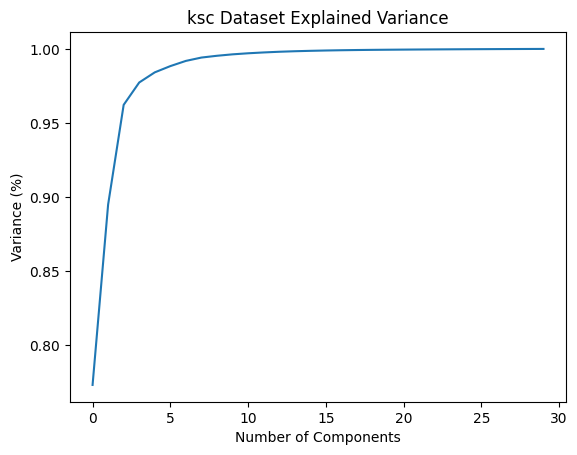

In [8]:
import matplotlib.pyplot as plt
pca = PCA(n_components=30)
pca.fit_transform(X_train)
newspace=pca.components_
newspace=newspace.transpose()
X_train=np.matmul(X_train,newspace)
print(pca.n_components_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('ksc Dataset Explained Variance')
plt.show()
X_test=np.matmul(X_test,newspace)

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
import pandas as pd
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))

Accuracy : 92.61744966442953
Cohen Kappa Score : 91.7639288984969
              precision    recall  f1-score   support

           1       0.90      0.97      0.94       152
           2       0.89      0.98      0.93        49
           3       0.84      0.92      0.88        51
           4       0.69      0.72      0.71        50
           5       0.91      0.62      0.74        32
           6       0.81      0.57      0.67        46
           7       0.94      0.81      0.87        21
           8       0.96      0.90      0.93        86
           9       0.90      0.99      0.94       104
          10       0.99      0.91      0.95        81
          11       0.99      1.00      0.99        84
          12       0.95      0.99      0.97       101
          13       1.00      1.00      1.00       186

    accuracy                           0.93      1043
   macro avg       0.91      0.88      0.89      1043
weighted avg       0.93      0.93      0.92      1043

